In [1]:
# General:
import tweepy
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# API's setup:
from TweetAnalysis.credentials import *

In [3]:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [4]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="AccruentLLC", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

5 recent tweets:

As companies prepare to become #FASB #IASB compliant, know that @AccruentLLC FASB/IASB calculations are certified b… https://t.co/X88Yswrdq0

By making your #healthcare techs more efficient, effective and engaged, you can accommodate the increasing demand.… https://t.co/1Sx2JtS9ah

Actively selecting a compliant #leaseaccounting solution? Learn about @AccruentLLC relationships with @PwC and… https://t.co/SdboPELRj6

When you measure all #healthcare tech activities, you can decide how techs should spend their time. Learn how:… https://t.co/M8Dt7LMQGg

RT @kykloud: @AccruentLLC @kykloud ‘s Tom Aburrow-Newman walking through how we Shape-Drive-Manage-Control our customers physical assets! #…



In [5]:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

969573272143716352
2018-03-02 14:00:56
Hootsuite
1
0
None
None
{'hashtags': [{'text': 'FASB', 'indices': [31, 36]}, {'text': 'IASB', 'indices': [37, 42]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AccruentLLC', 'name': 'Accruent LLC', 'id': 2446023122, 'id_str': '2446023122', 'indices': [64, 76]}], 'urls': [{'url': 'https://t.co/X88Yswrdq0', 'expanded_url': 'https://twitter.com/i/web/status/969573272143716352', 'display_url': 'twitter.com/i/web/status/9…', 'indices': [117, 140]}]}


In [6]:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [7]:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [8]:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,As companies prepare to become #FASB #IASB com...,140,969573272143716352,2018-03-02 14:00:56,Hootsuite,1,0
1,By making your #healthcare techs more efficien...,139,969543064980246528,2018-03-02 12:00:54,Hootsuite,2,0
2,Actively selecting a compliant #leaseaccountin...,135,969301496469819393,2018-03-01 20:01:00,Hootsuite,2,0
3,When you measure all #healthcare tech activiti...,135,969256280958341120,2018-03-01 17:01:19,Hootsuite,2,0
4,RT @kykloud: @AccruentLLC @kykloud ‘s Tom Abur...,140,969246511111589888,2018-03-01 16:22:30,Twitter Web Client,0,2
5,RT @Swaneroo: Looking good team! We are expan...,140,969235380913483777,2018-03-01 15:38:16,Twitter Web Client,0,3
6,Doing what we do best at the #Accruent #Austin...,140,969225577050845188,2018-03-01 14:59:19,Twitter Web Client,5,5
7,The @AccruentLLC relationship with @PwC allows...,124,969210823028682753,2018-03-01 14:00:41,Hootsuite,0,0
8,A better way to address the #healthcare tech s...,139,969180649331585026,2018-03-01 12:00:47,Hootsuite,0,1
9,Manage the thousands of leases in your portfol...,136,969165512579133441,2018-03-01 11:00:39,Hootsuite,0,0


In [9]:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 130.01


In [10]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
More than 7,000 customers around the globe depend on Accruent to help them manage their physical resources. See… https://t.co/mM9wUPSOMx
Number of likes: 7
136 characters.

The tweet with more retweets is: 
RT @BIFMAwards: #FridayFeeling. Thank you to all our latest #BIFMAwards sponsors @Ameyplc
FES @SkanskaGroup @AccruentLLC @Screwfix @Facilit…
Number of retweets: 7
140 characters.



In [11]:
tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

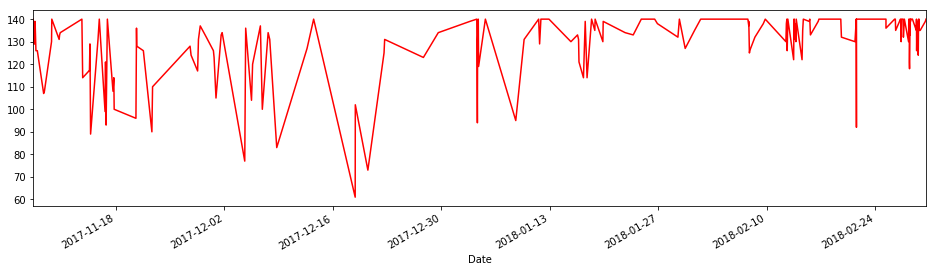

In [12]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');

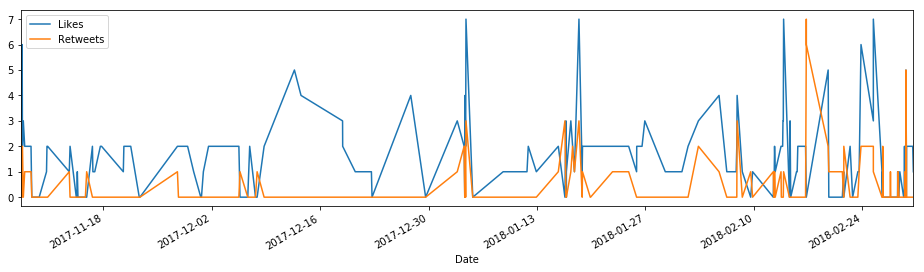

In [13]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

In [14]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Hootsuite
* Twitter Web Client


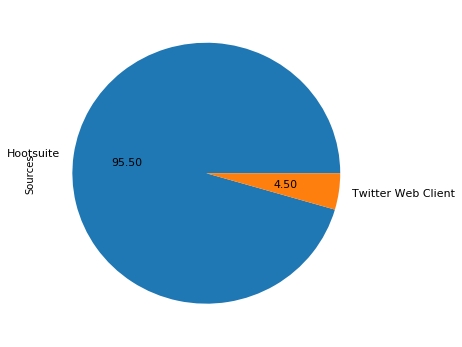

In [15]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [17]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

ModuleNotFoundError: No module named 'textblob'

In [ ]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])
data['SARaw'] = np.array([TextBlob(clean_tweet(tweet)).sentiment.polarity for tweet in data['Tweets']])

# We display the updated dataframe with the new column:
display(data.head(10))

In [ ]:
pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [ ]:
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage of negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))